# GRAB-DA TFC

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import sys
# change pkg_path variable to the directory storing the package
sys.path.insert(0, '../utility_code')
import fp_dat, fp_viz
import fearData as fd
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as sci
import pingouin as pg


/Users/jake/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/jake/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


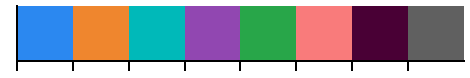

In [2]:
fp_viz.plot_style()
npg_pal=['#2b88f0', '#EF862E', '#00B9B9', '#9147B1', '#28A649', '#F97B7B', '#490035', '#606060']
fp_viz.set_palette(color_pal=['#2b88f0', '#EF862E', '#00B9B9', '#9147B1', '#28A649', '#F97B7B', '#490035', '#606060'], show = True)

In [3]:
df_train_trials = pd.read_csv(
    './data-clean/GRAB_DA_TFC_All.csv')


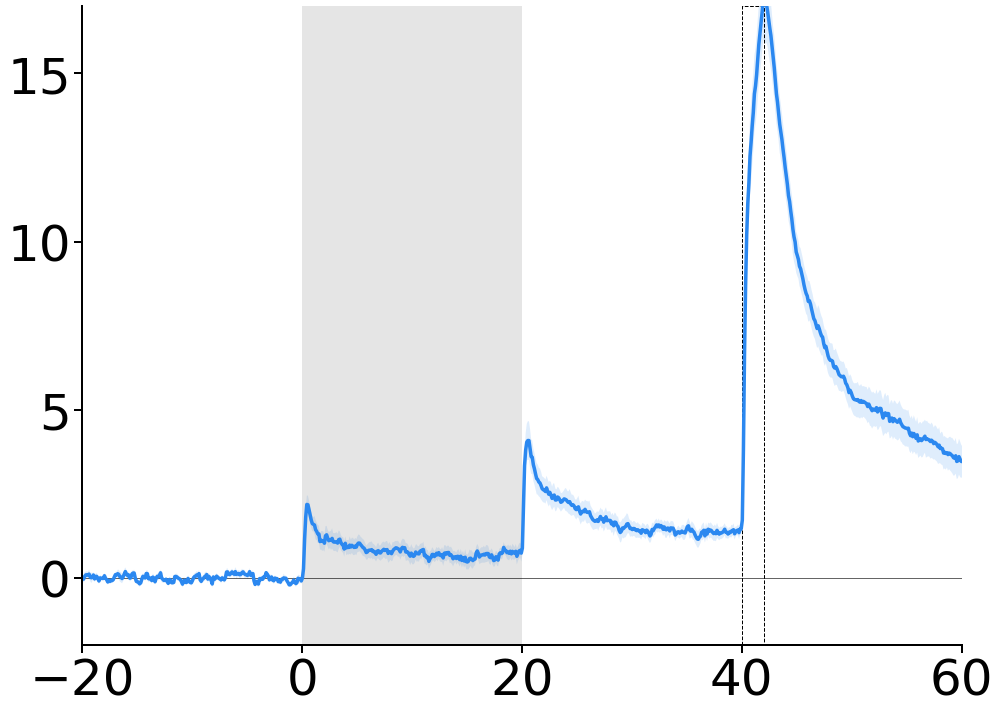

In [4]:
fp_viz.tfc_trial_avg(df_train_trials,
                     yvar='465nm_dFF_norm',
                     fig_size=(14, 10), linewidth=3.5)

plt.ylim(-2, 16.99)
plt.xlim(-20, 60)


ax = plt.gca()

tick_size = 50


ax.tick_params(labelsize=tick_size, width=2, length=8)
ax.set_ylabel('')
ax.set_xlabel('')

plt.tight_layout()


In [5]:
df_pre_post = fp_dat.calc_pre_post(df_train_trials, event = 'tone', t_pre = (-2,0), t_post = (0,2), measure = 'max')
fp_dat.pre_post_stats(df_pre_post, yvar='465nm_dFF_norm')

t-statistic: 6.352822253387474
p-value: 0.00013243336661496356


In [6]:
df_pre_post = fp_dat.calc_pre_post(df_train_trials, event = 'tone termination', t_pre = (18,20), t_post = (20,22), measure = 'max')
fp_dat.pre_post_stats(df_pre_post, yvar='465nm_dFF_norm')

t-statistic: 5.894637194842518
p-value: 0.00023059969021596504


In [7]:
df_pre_post = fp_dat.calc_pre_post(df_train_trials, event = 'shock', t_pre = (38,40), t_post = (40,42), measure = 'max')
fp_dat.pre_post_stats(df_pre_post, yvar='465nm_dFF_norm')

t-statistic: 13.029248862381241
p-value: 3.8087659235435844e-07


In [8]:


# create DataFrames of relevant time points
df_tone = df_train_trials.loc[df_train_trials['time_trial'].between(0, 2), :]
df_shk = df_train_trials.loc[df_train_trials['time_trial'].between(40, 42), :]

# average across time bin for each trial within each subject
df_trial_tone = df_tone.groupby(['Animal', 'Trial']).max().loc[:,'465nm_dFF_norm'].reset_index()
df_trial_shk = df_shk.groupby(['Animal', 'Trial']).max().loc[:,'465nm_dFF_norm'].reset_index()

# average across all subjects
df_tone_trace_avg = df_trial_tone.groupby(['Trial']).mean().loc[:,'465nm_dFF_norm'].reset_index()
df_trial_shk_avg = df_trial_shk.groupby(['Trial']).mean().loc[:,'465nm_dFF_norm'].reset_index()

No handles with labels found to put in legend.


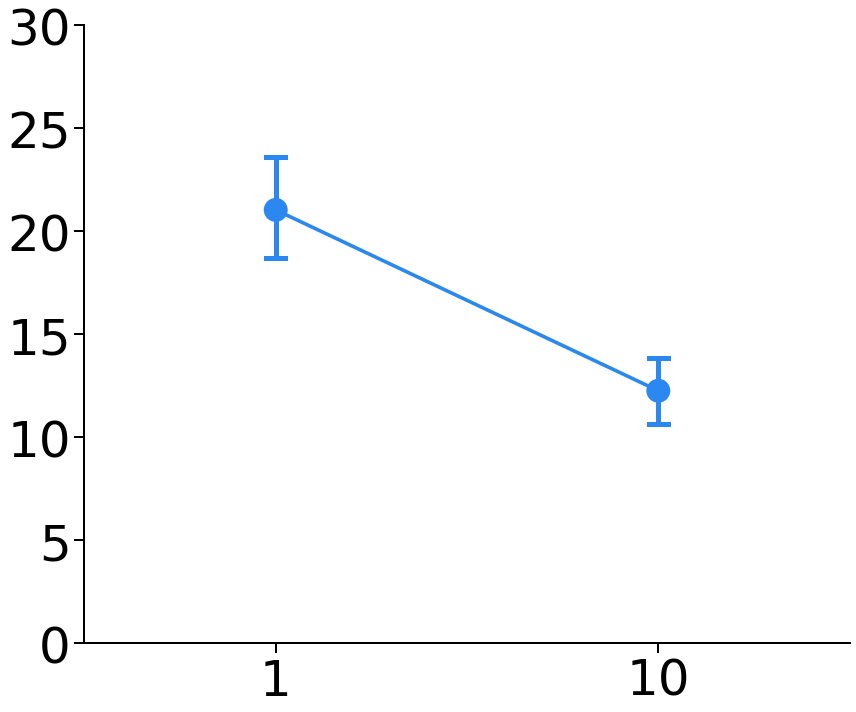

In [9]:
fd.tfc_plot(df_trial_shk.query("Trial in [1,10]"), xvar='Trial', yvar = '465nm_dFF_norm', min_bins=False, tone_squares=False, trace_squares=False,
            shock_line=False, 
            errwidth=5, scale=1, figsize=(12, 10), marker_size=450)

plt.ylim(0, 30)
plt.xlabel('')
plt.ylabel('')

ax = plt.gca()
ax.tick_params(labelsize=50)
L = ax.legend(markerscale=.5, fontsize=50, loc='upper left')

plt.tight_layout()



In [10]:
df_trial_shk_1 = df_trial_shk.query("Trial == 1")
df_trial_shk_10 = df_trial_shk.query("Trial == 10")


In [11]:
pg.ttest(df_trial_shk_1['465nm_dFF_norm'], df_trial_shk_10['465nm_dFF_norm'], paired = True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.418158,9,two-sided,0.038727,"[0.57, 16.99]",1.275213,2.141,0.946869


No handles with labels found to put in legend.


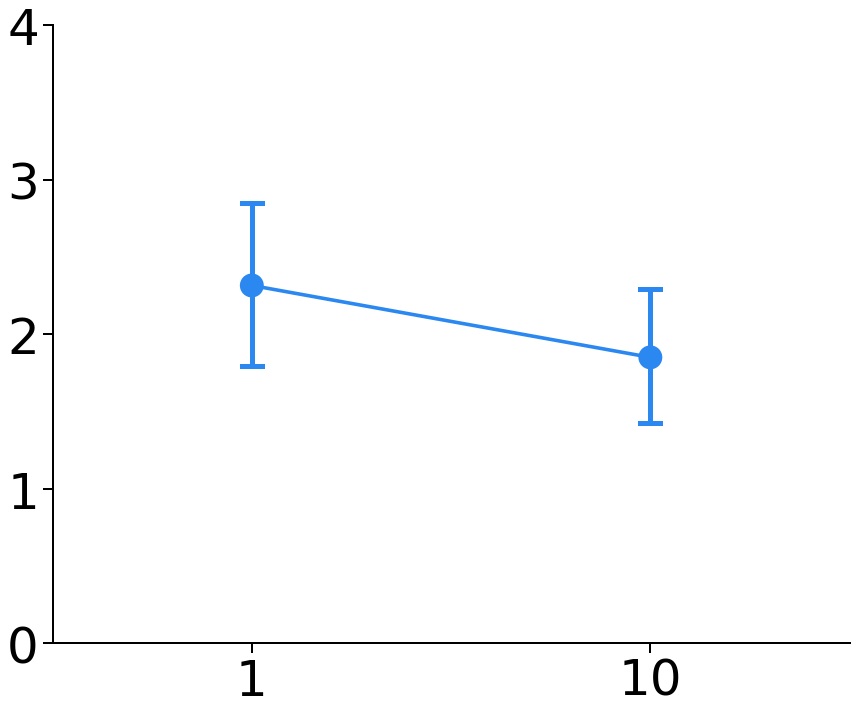

In [12]:
fd.tfc_plot(df_trial_tone.query("Trial in [1,10]"), xvar='Trial', yvar='465nm_dFF_norm', min_bins=False, tone_squares=False, trace_squares=False,
            shock_line=False,
            errwidth=5, scale=1, figsize=(12, 10), marker_size=450)

plt.ylim(0, 4)
plt.xlabel('')
plt.ylabel('')

ax = plt.gca()
ax.tick_params(labelsize=50)
L = ax.legend(markerscale=.5, fontsize=50, loc='upper left')

plt.tight_layout()


In [13]:
df_trial_tone_1 = df_trial_tone.query("Trial == 1")
df_trial_tone_10 = df_trial_tone.query("Trial == 10")


In [14]:
pg.ttest(df_trial_tone_1['465nm_dFF_norm'], df_trial_tone_10['465nm_dFF_norm'], paired = True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.645571,9,two-sided,0.534668,"[-1.17, 2.1]",0.28187,0.368,0.125817
